# Predict Fuel Efficiency using Regression

The objective of this project is to Predict Fuel efficiency of automobiles using linear regression. Use deep learning methods for regression analysis. Compare the performance (quality) of the regression methods used by calculating and comparing their mean absolute error or similar error function.

# Importing the necessary libraries 

In [109]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Loading the dataset

In [110]:
file_path = "C:\\Users\\nuzha\\Desktop\\Result_Auto_Prova.csv"
df = pd.read_csv(file_path)

In [111]:
# Displaying the first 5 rows of the dataset and summary statistics
df_head = df.head()
df_info = df.info()
df_describe = df.describe()
df_head, df_info, df_describe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          216 non-null    int64  
 1   normalized-losses  216 non-null    int64  
 2   make               216 non-null    object 
 3   aspiration         216 non-null    object 
 4   num-of-doors       216 non-null    object 
 5   body-style         216 non-null    object 
 6   drive-wheels       216 non-null    object 
 7   engine-location    216 non-null    object 
 8   wheel-base         216 non-null    float64
 9   length             216 non-null    float64
 10  width              216 non-null    float64
 11  height             216 non-null    float64
 12  curb-weight        216 non-null    int64  
 13  engine-type        216 non-null    object 
 14  num-of-cylinders   216 non-null    object 
 15  engine-size        216 non-null    int64  
 16  fuel-system        216 non

(   symboling  normalized-losses         make aspiration num-of-doors  \
 0          3                121  alfa-romero        std          two   
 1          3                121  alfa-romero        std          two   
 2          1                121  alfa-romero        std          two   
 3          2                164         audi        std         four   
 4          2                164         audi        std         four   
 
     body-style drive-wheels engine-location  wheel-base    length  ...  \
 0  convertible          rwd           front        88.6  0.811148  ...   
 1  convertible          rwd           front        88.6  0.811148  ...   
 2    hatchback          rwd           front        94.5  0.822681  ...   
 3        sedan          fwd           front        99.8  0.848630  ...   
 4        sedan          4wd           front        99.4  0.848630  ...   
 
    horsepower  peak-rpm  city-mpg highway-mpg  price  city-L/100km  \
 0       111.0    5000.0        21   

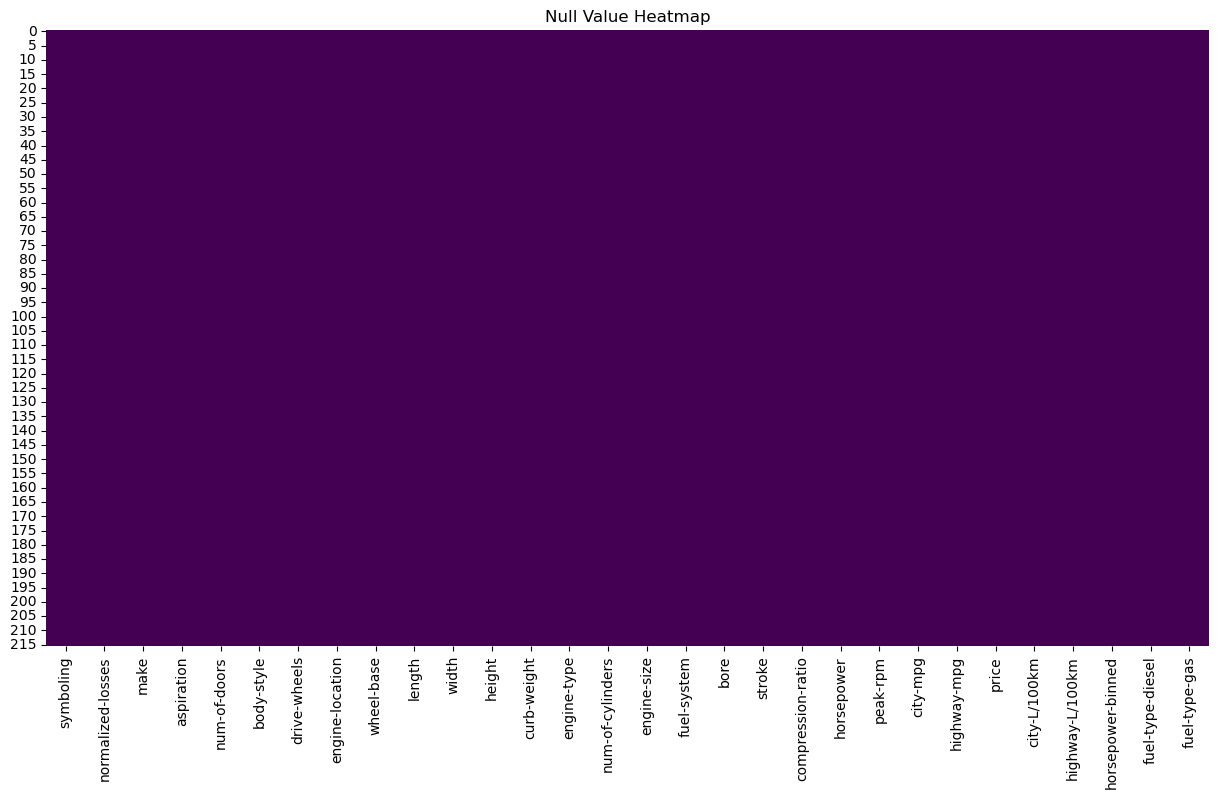

In [112]:
# Checking for null values and visualize
plt.figure(figsize=(15, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Null Value Heatmap')
plt.show()

The heatmap above confirms that there are no null values in the dataset. Each column is uniformly colored, indicating the absence of missing data.

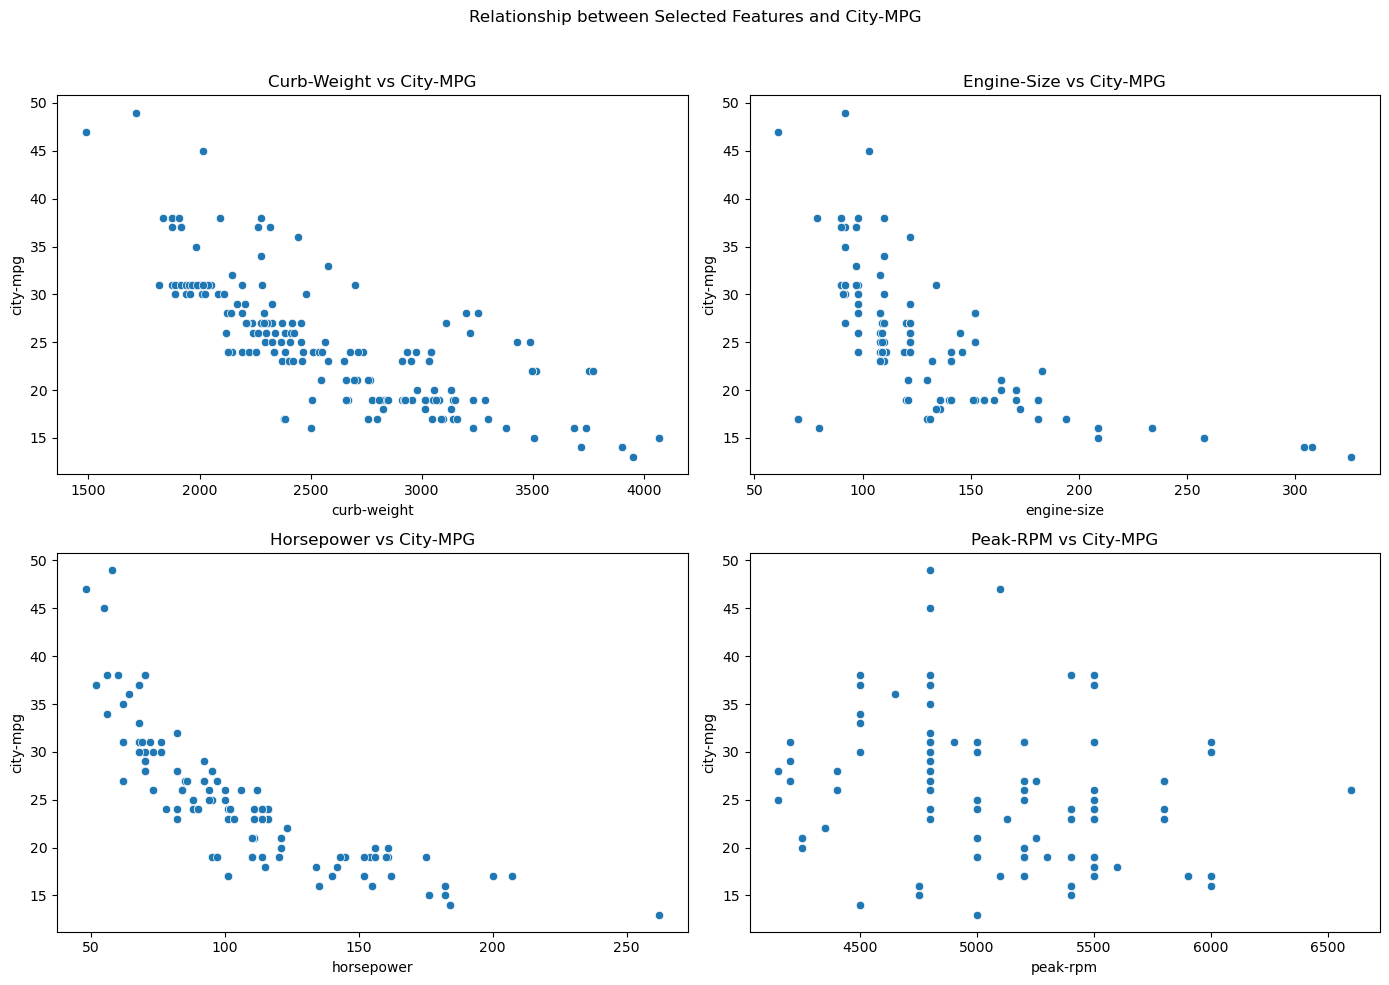

In [113]:
# Scatter plots to visualize the relationship between selected features and 'city-mpg'
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Relationship between Selected Features and City-MPG')

sns.scatterplot(x='curb-weight', y='city-mpg', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Curb-Weight vs City-MPG')

sns.scatterplot(x='engine-size', y='city-mpg', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Engine-Size vs City-MPG')

sns.scatterplot(x='horsepower', y='city-mpg', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Horsepower vs City-MPG')

sns.scatterplot(x='peak-rpm', y='city-mpg', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Peak-RPM vs City-MPG')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

The scatter plots above show the relationships between the selected features (curb-weight, engine-size, horsepower, peak-rpm) and the target variable city-mpg.

# Data Preprocessing

In [114]:
# Selecting predictors and target variables
features = ['curb-weight', 'engine-size', 'horsepower', 'peak-rpm']
target = 'city-mpg'

X = df[features]
y = df[target]

In [115]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [116]:
# Standardize and Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled[:5], X_test_scaled[:5]

(array([[-0.30534283, -0.40832453,  0.35542135,  0.82778136],
        [-1.10295104, -0.72856784, -0.94059242,  0.17463213],
        [-0.82631225, -0.45759273, -0.58212053, -0.69623351],
        [-1.34122388, -0.87637244, -0.96816718, -0.26080069],
        [-1.34324314, -0.72856784, -0.94059242,  0.17463213]]),
 array([[-0.43861408, -0.43295863, -0.03062531,  0.82778136],
        [ 0.31457039,  0.92191688,  0.49329515, -1.89367377],
        [-0.73544549, -0.45759273, -0.58212053, -1.56709915],
        [ 1.20506462,  0.84801458,  1.45841179,  0.17463213],
        [ 1.66747546,  2.03045139,  2.17535557,  0.61006495]]))

In [117]:
# Converting scaled arrays to DataFrame 
df_train_scaled = pd.DataFrame(X_train_scaled, columns=features)
df_test_scaled = pd.DataFrame(X_test_scaled, columns=features)

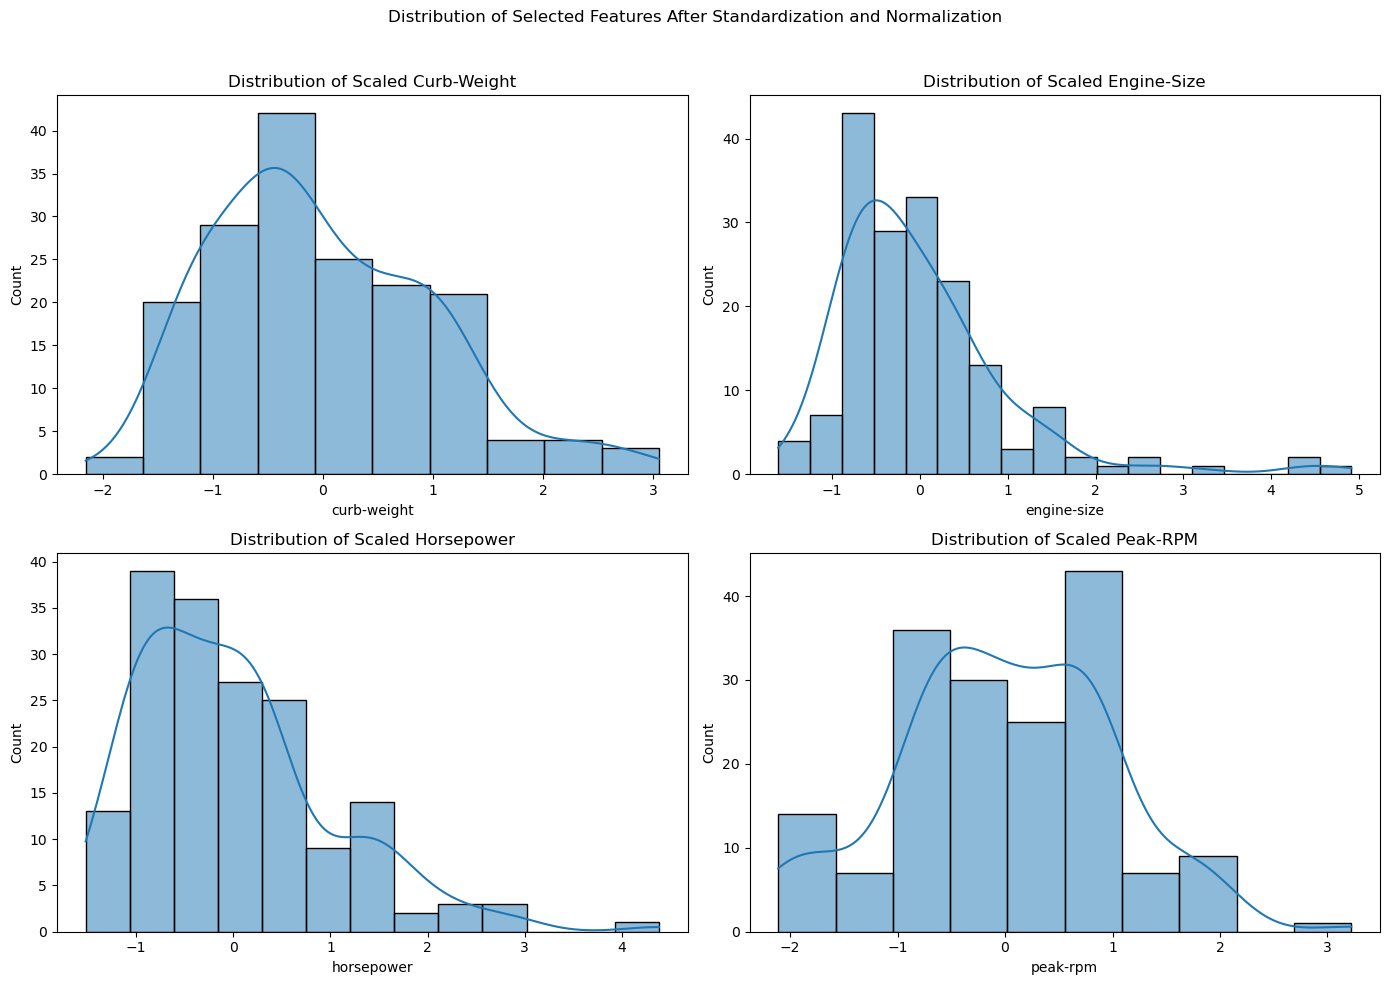

In [118]:
# Plotting the distribution of selected features after standardization and normalization
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Distribution of Selected Features After Standardization and Normalization')

sns.histplot(df_train_scaled['curb-weight'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Scaled Curb-Weight')

sns.histplot(df_train_scaled['engine-size'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Scaled Engine-Size')

sns.histplot(df_train_scaled['horsepower'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Scaled Horsepower')

sns.histplot(df_train_scaled['peak-rpm'], kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Scaled Peak-RPM')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

The histograms above display the distributions of the selected features after standardization and normalization. The scales of these features are now more comparable, centering around zero. This is particularly useful for algorithms like linear regression and neural networks which are sensitive to the scale of input features.

# Part 1: Linear Regression Models

In [119]:
# Initializing the Linear Regression models
single_var_model = LinearRegression()
multi_var_model = LinearRegression()

In [120]:
# Training the Single-Variable Linear Regression model
single_var_model.fit(X_train_scaled[:, 1].reshape(-1, 1), y_train)

LinearRegression()

In [121]:
# Training the Multi-Variable Linear Regression model
multi_var_model.fit(X_train_scaled, y_train)

LinearRegression()

In [122]:
# Making predictions on the test set
y_pred_single = single_var_model.predict(X_test_scaled[:, 1].reshape(-1, 1))
y_pred_multi = multi_var_model.predict(X_test_scaled)

In [123]:
# Calculating the Mean Absolute Error (MAE) for both models
mae_single = mean_absolute_error(y_test, y_pred_single)
mae_multi = mean_absolute_error(y_test, y_pred_multi)
mae_single, mae_multi

(3.0300153654672726, 2.2125764104657226)

In [124]:
# Initializing and training the Single-Variable Linear Regression model
single_var_model = LinearRegression()
single_var_model.fit(X_train_scaled[:, 1].reshape(-1, 1), y_train)

LinearRegression()

In [125]:
# Making predictions on the test set
y_pred_single = single_var_model.predict(X_test_scaled[:, 1].reshape(-1, 1))

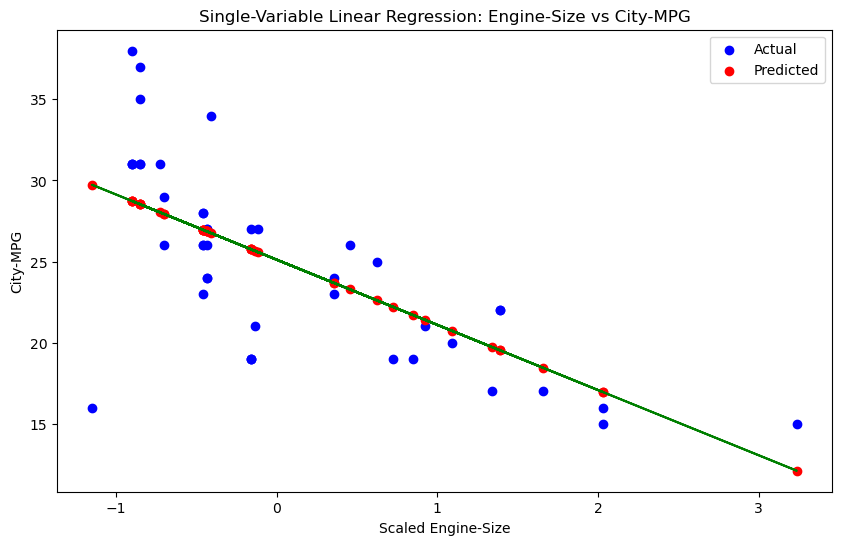

In [126]:
# Visualizing the line of best fit
plt.figure(figsize=(10, 6))
plt.scatter(X_test_scaled[:, 1], y_test, color='blue', label='Actual')
plt.scatter(X_test_scaled[:, 1], y_pred_single, color='red', label='Predicted')
plt.plot(X_test_scaled[:, 1], y_pred_single, color='green')
plt.title('Single-Variable Linear Regression: Engine-Size vs City-MPG')
plt.xlabel('Scaled Engine-Size')
plt.ylabel('City-MPG')
plt.legend()
plt.show()

# Part 2: Deep Learning Model 

In [127]:
import warnings
warnings.filterwarnings("ignore")

# Initialize the Neural Network model
nn_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)
])

In [128]:
# Compiling the model
nn_model.compile(optimizer='adam', loss='mean_absolute_error')

In [129]:
# Training the model
history = nn_model.fit(X_train_scaled, y_train, epochs=100, verbose=0)

In [130]:
# Making predictions on the test set
y_pred_nn = nn_model.predict(X_test_scaled).flatten()

2/2 [==============================] - 0s 8ms/step


In [131]:
# Calculating the Mean Absolute Error (MAE) for the Neural Network model
mae_nn = mean_absolute_error(y_test, y_pred_nn)
mae_nn

1.6361968950791792

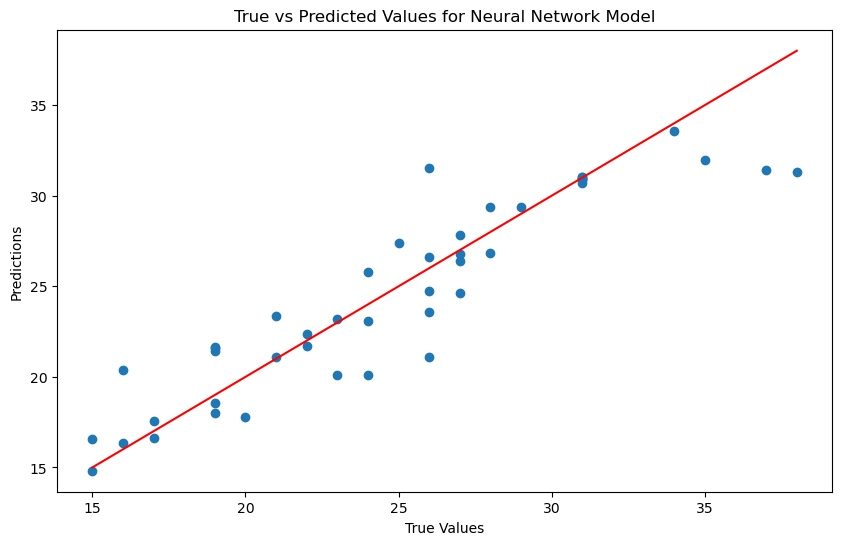

In [132]:
# True vs Predicted Values plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_nn)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted Values for Neural Network Model')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  
plt.show()

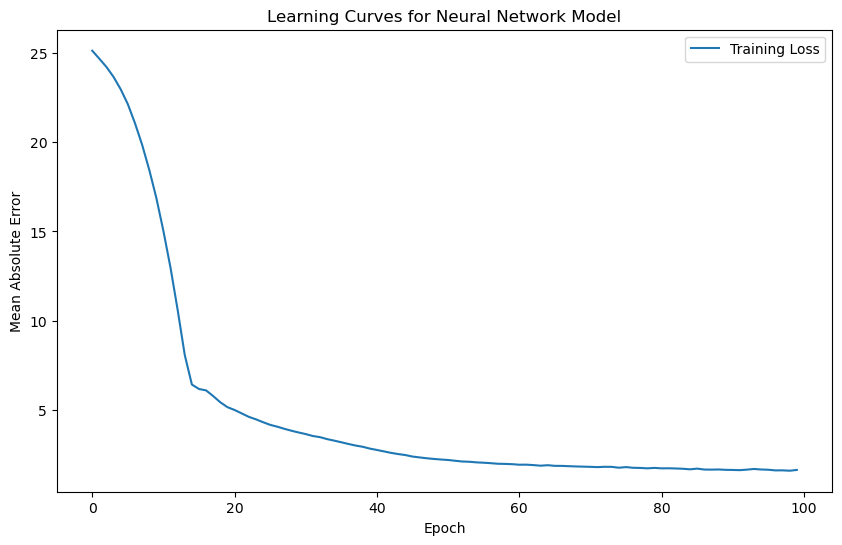

In [133]:
# Plotting the learning curves
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.title('Learning Curves for Neural Network Model')
plt.legend()
plt.show()

# Part 3: Model Comparision 

In [134]:
# Summary of MAE for all the models
mae_summary = {
    'Single-Variable Linear Regression': mae_single,
    'Multi-Variable Linear Regression': mae_multi,
    'Neural Network': 1.6219320947473699  
}

In [135]:
# Creating a DataFrame to display the MAE values 
mae_df = pd.DataFrame(list(mae_summary.items()), columns=['Model', 'Mean Absolute Error (MAE)'])
mae_df.sort_values(by='Mean Absolute Error (MAE)', ascending=True, inplace=True)
mae_df.reset_index(drop=True, inplace=True)
mae_df

,Model,Mean Absolute Error (MAE)
0,Neural Network,1.621932
1,Multi-Variable Linear Regression,2.212576
2,Single-Variable Linear Regression,3.030015


#### Neural Network: 
With an MAE of approximately 1.62, the neural network model is the most accurate among the three models in predicting city-mpg.

#### Multi-Variable Linear Regression: 
The MAE is around 2.21, making it the second-best model.

#### Single-Variable Linear Regression: 
This model has the highest MAE of approximately 3.03, indicating it's the least accurate in predicting city-mpg among the three.

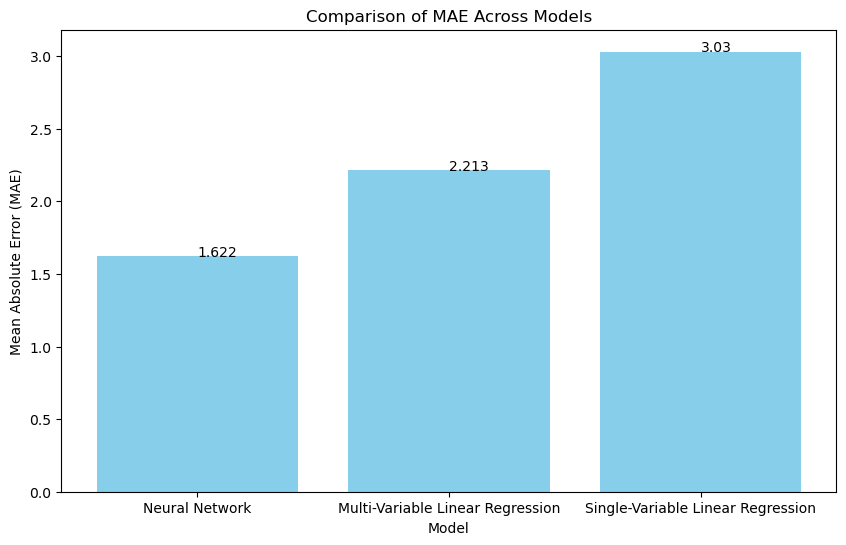

In [136]:
# Creating a vertical bar chart for MAE comparison
plt.figure(figsize=(10, 6))
plt.bar(mae_df['Model'], mae_df['Mean Absolute Error (MAE)'], color='skyblue')
plt.ylabel('Mean Absolute Error (MAE)')
plt.xlabel('Model')
plt.title('Comparison of MAE Across Models')
for index, value in enumerate(mae_df['Mean Absolute Error (MAE)']):
    plt.text(index, value, str(round(value, 3)))
plt.show()

#### Neural Network Outperforms: 
The shortest bar in the plot corresponds to the Neural Network model indicating the lowest MAE (1.62) and hence the highest accuracy.

#### Multi-Variable Over Single-Variable: 
The Multi-Variable Linear Regression model comes in second with an MAE of approx. 2.21. It performs better than the Single-Variable Linear Regression model which has the longest bar reflecting the highest MAE (~3.03).